<a href="https://colab.research.google.com/github/dchij/Flashfood-App-Review-Sentiment-Analysis/blob/main/Flashfood_App_Reviews'_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Sentiment Analysis of the Flashfood App Reviews**

I scraped the User Reviews for the Flashfood App using Google Play Scraper from the Google play store. Two considerations before scraping the app:

I wanted:

* Balanced dataset - roughly the same number of reviews for each score (1-5)
* A representative sample of the reviews for the app

I satisfied the first requirement by using the scraping package option to filter the review score. For the second, I sorted the reviews by their helpfulness, which are the reviews that Google Play thinks are most important. Just in case, I got a subset from the newest, too.

In this project, I will explore and visualize the text data.

##**1. Import the data** 

In [ ]:
#importing all libraries 
import pandas as pd
from textblob import TextBlob
import re
import seaborn as sns
import matplotlib.pyplot as plt
import string

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [ ]:
#uploading the scraped dataset

from google.colab import files
uploaded = files.upload()

Saving reviews.csv to reviews.csv


In [ ]:
# reading into a dataframe and previewing the dataframe

df = pd.read_csv("reviews.csv")
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOHouxbhn4pSDD4951Kc6ZR1d0macscSe1nxTLx...,Kelly Bergen,https://play-lh.googleusercontent.com/a-/AOh14...,The idea is good but the execution is terrible...,1,12,2.19.0,2021-05-17 00:05:10,This doesn't seem right. We want to take a clo...,2020-01-08 18:56:51,most_relevant,com.flashfoodapp.android
1,gp:AOqpTOFZHLN14dpF0PVBmNXyVPldVmr3bjZEM6jocSy...,Kimmy T,https://play-lh.googleusercontent.com/a/AATXAJ...,Couldn't get search for a place closer to my h...,1,6,2.17.0,2021-04-17 04:07:45,So sorry to hear that Kimmy! We're always look...,2021-05-11 12:45:04,most_relevant,com.flashfoodapp.android
2,gp:AOqpTOGBR12Nsi8rO0sQu38r6qbgLzUdO2pXzC8yscu...,Karen Williams,https://play-lh.googleusercontent.com/a/AATXAJ...,"D/l the app, tried several times to create a n...",1,4,2.17.0,2021-04-11 03:42:45,Hey Karen! So sorry to hear that! This error u...,2021-05-11 16:02:25,most_relevant,com.flashfoodapp.android
3,gp:AOqpTOHmIuSw2r0Ro1bBL2MpU--Wensa3MGOqSX5PJE...,Rebecca Tutuola,https://play-lh.googleusercontent.com/a/AATXAJ...,Pantries and food banks could get this food to...,1,2,2.19.0,2021-05-18 20:07:43,We realize the importance of donations. Stores...,2021-05-26 17:17:31,most_relevant,com.flashfoodapp.android
4,gp:AOqpTOGdB3bo6qao2G0rlSb4iktdwzpErO8JLTPxb0Q...,Charlie Bee,https://play-lh.googleusercontent.com/a/AATXAJ...,The items I bought 2 hours earlier (at a Maxi)...,1,1,2.17.0,2021-05-07 02:57:10,Oh no! That's extremely unfortunate and we're ...,2021-05-07 03:41:30,most_relevant,com.flashfoodapp.android


##**2. Data exploration**

I will check the data for missing values and drop columns that would not be needed for this project

In [ ]:
#check for missing values
#check the shape of the dataframe

print(df.shape)

df.info()

(996, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              996 non-null    object
 1   userName              996 non-null    object
 2   userImage             996 non-null    object
 3   content               996 non-null    object
 4   score                 996 non-null    int64 
 5   thumbsUpCount         996 non-null    int64 
 6   reviewCreatedVersion  877 non-null    object
 7   at                    996 non-null    object
 8   replyContent          853 non-null    object
 9   repliedAt             853 non-null    object
 10  sortOrder             996 non-null    object
 11  appId                 996 non-null    object
dtypes: int64(2), object(10)
memory usage: 93.5+ KB


No missing values in the `score` and review texts i.e. the `content` column; So I'll leave the dataframe as is. I will drop these irrelevant columns : `reviewId`, `userImage` and `appId` columns. They will not be needed for analysis.

In [ ]:
# reassigning the df dataframe to a new dataframe ff
ff = df.drop(['reviewId','userImage','appId'], axis=1)
ff.head()

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder
0,Kelly Bergen,The idea is good but the execution is terrible...,1,12,2.19.0,2021-05-17 00:05:10,This doesn't seem right. We want to take a clo...,2020-01-08 18:56:51,most_relevant
1,Kimmy T,Couldn't get search for a place closer to my h...,1,6,2.17.0,2021-04-17 04:07:45,So sorry to hear that Kimmy! We're always look...,2021-05-11 12:45:04,most_relevant
2,Karen Williams,"D/l the app, tried several times to create a n...",1,4,2.17.0,2021-04-11 03:42:45,Hey Karen! So sorry to hear that! This error u...,2021-05-11 16:02:25,most_relevant
3,Rebecca Tutuola,Pantries and food banks could get this food to...,1,2,2.19.0,2021-05-18 20:07:43,We realize the importance of donations. Stores...,2021-05-26 17:17:31,most_relevant
4,Charlie Bee,The items I bought 2 hours earlier (at a Maxi)...,1,1,2.17.0,2021-05-07 02:57:10,Oh no! That's extremely unfortunate and we're ...,2021-05-07 03:41:30,most_relevant


##**3. Data preprocessing/cleaning**

**Here, the following data preprocessing procedures will be done:**
* Clean `content` column.
* Use TextBlob to calculate sentiment polarity which lies in the range of [-1,1] where 1 means positive sentiment and -1 means a negative sentiment.
* Create new feature for the length of the review.
* Create new feature for the word count of the review.
* convert the `at` and `repliedAt` columns to datetime data type

In [ ]:
cols = ['at', 'repliedAt']

for i in cols:
  pd.to_datetime(ff[i])


In [ ]:
#cleaning the content column and adding new columns to the dataframe

# lowercase the content column
ff['review_text']=ff['content'].apply(lambda x: x.lower())



#remove digits and words containing digits
ff['review_text']=ff['review_text'].apply(lambda x: re.sub('\w*\d\w*','', x))



#remove punctuations
ff['review_text']=ff['review_text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))



# Removing extra spaces
ff['review_text']=ff['review_text'].apply(lambda x: re.sub(' +',' ',x))



ff['polarity'] = ff['review_text'].map(lambda text: TextBlob(text).sentiment.polarity)
ff['review_len'] = ff['review_text'].astype(str).apply(len)
ff['word_count'] = ff['review_text'].apply(lambda x: len(str(x).split()))

To preview whether the sentiment polarity score works, randomly select 5 reviews with the highest sentiment polarity score (1):

In [ ]:
print('5 random reviews with the highest positive sentiment polarity: \n')
sample = ff.loc[ff.polarity == 1, ['review_text']].sample(5).values
for i in sample:
    print(i[0])

5 random reviews with the highest positive sentiment polarity: 

awesome way to shop cheaper but the people who dont know about it might take the food not knowing
excellent app
it works and its excellent
awesome
delicious 😋 deliciousness


Then randomly select 5 reviews with the most neutral sentiment polarity score (zero):

In [ ]:
print('5 random reviews with the most neutral sentiment(zero) polarity: \n')
sample = ff.loc[ff.polarity == 0, ['review_text']].sample(5).values
for i in sample:
    print(i[0])

5 random reviews with the most neutral sentiment(zero) polarity: 


could never get it to work
an app for buying rotting moldy or day of expiry food gross
i was setting up account and even though i tried times the app would not let me enter the correct date of my birth even uninstalled app cleared cache still will not enter my correct birthdate i suspect it may have something to do with the day being a saturday the birthdate that enters is always the day before a friday
does not connect to my credit card from my galaxy 


Then, the most negative sentiment polarity score (-1):

In [ ]:
print('2 reviews with the most negative polarity: \n')
sample = ff.loc[ff.polarity == -1, ['review_text']].sample(2).values
for i in sample:
    print(i[0])

2 reviews with the most negative polarity: 

its boring that i couldt search the thing that i want could you please fix this problem🙀🙀
its boring that i couldt search the thing that i want could you please fix this problem🙀🙀


The sentiment polarity is working

##**4. Data visualization**

Now, let's visualize the distribution of the `review sentiment polarity score, score ratings, text length and word count`, to check if the data is skewed and its distribution.

**The distribution of review sentiment polarity score:**

Text(0, 0.5, 'count')

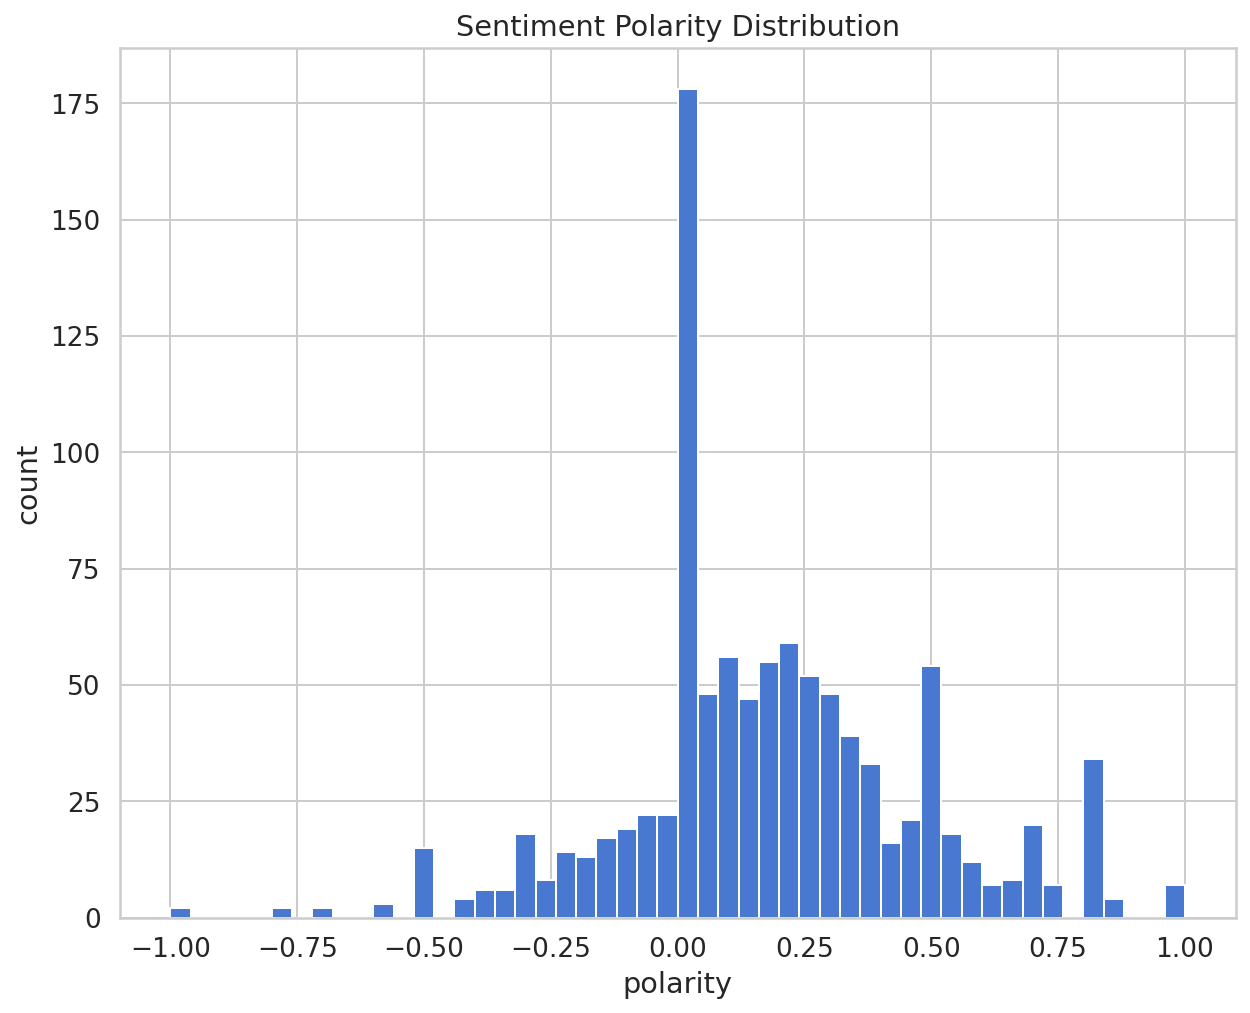

In [ ]:
plt.figure(figsize=(10,8))
ff['polarity'].hist(bins=50)
plt.title("Sentiment Polarity Distribution")
plt.xlabel('polarity')
plt.ylabel('count')


As seen in the above distribution, majority of the sentiment polarity scores are between 0 and 0.50; Also, there seems to be a high distribution of neutral sentiment scores (around 0). Finally, most of the sentiment polarity scores are greater than 0.




**The distribution of review score ratings:**

Text(0.5, 0, 'review score')

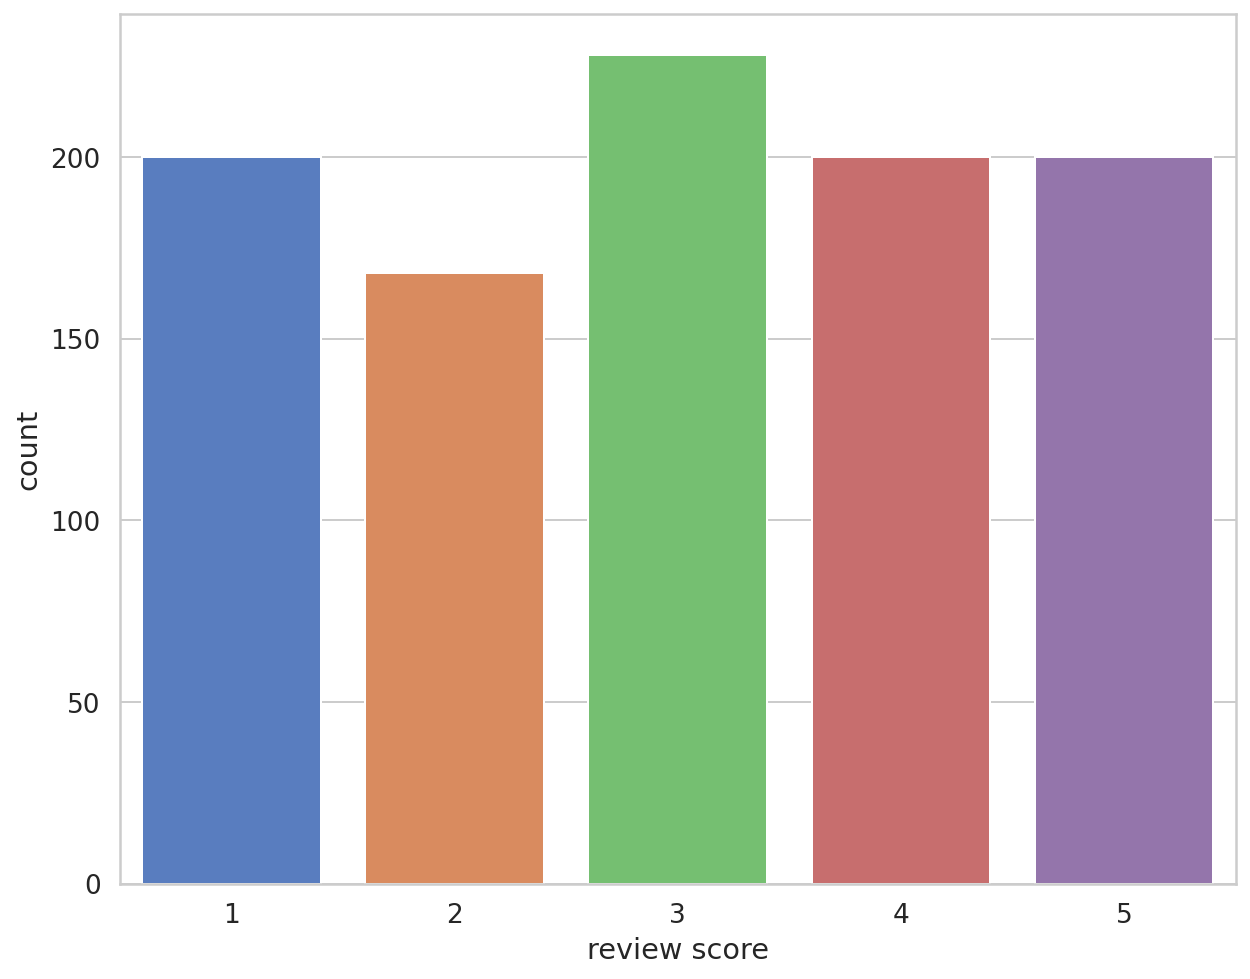

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x = ff.score)
plt.xlabel('review score')

Above, the review score of 3 is the highest while scores 1,4,5 seems to have same count. Lets verify below:

In [ ]:
scores = [1,2,3,4,5]
for i in scores:
  print(i,':',len(ff[ff['score'] == i]))

1 : 200
2 : 168
3 : 228
4 : 200
5 : 200


As seen above, review scores of 1, 4 and 5 have same count




**The distribution review text lengths:**

Text(0, 0.5, 'count')

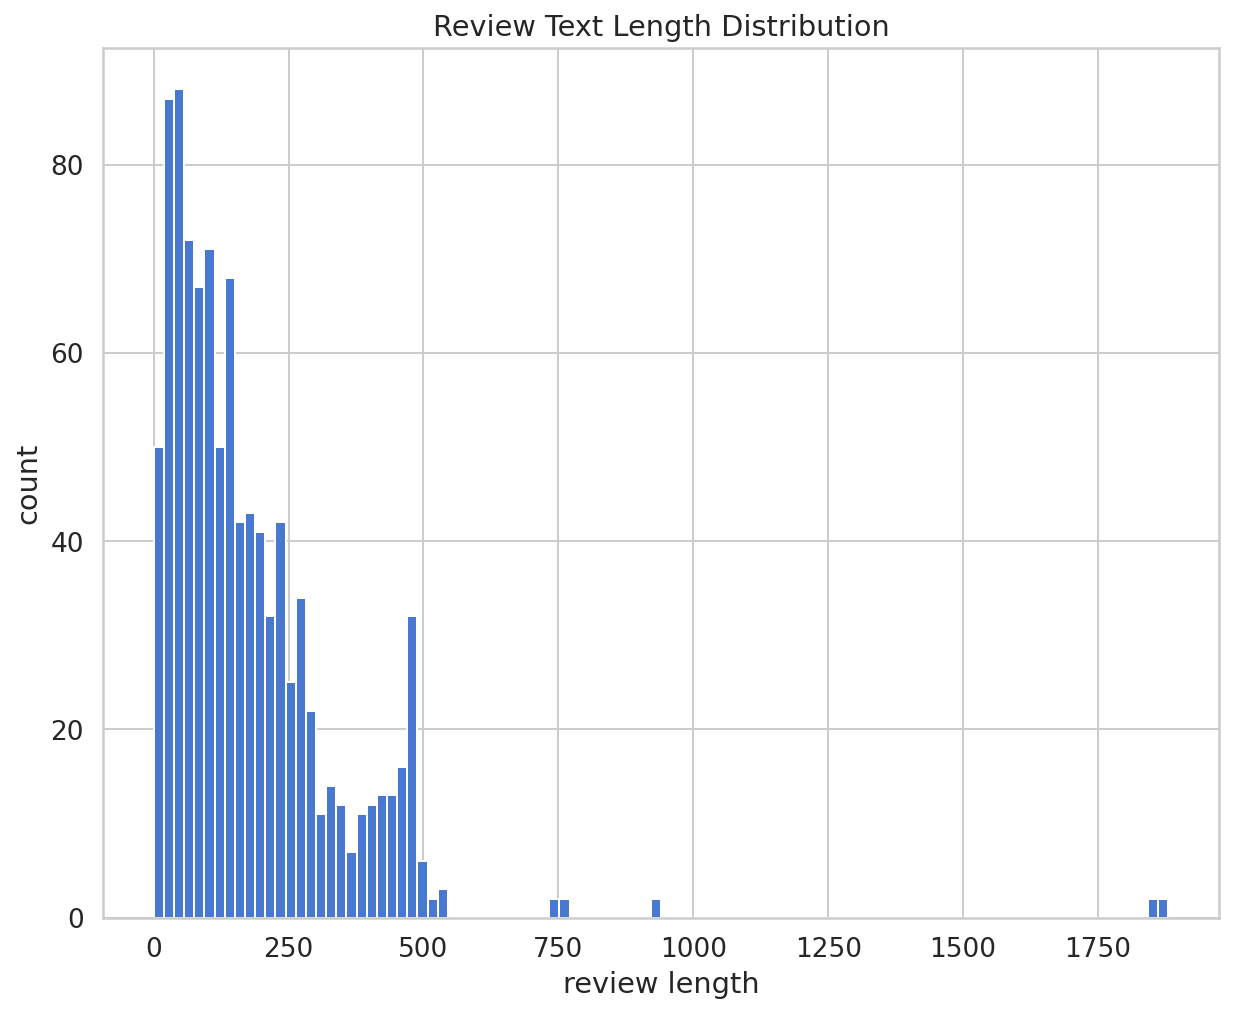

In [ ]:
plt.figure(figsize=(10,8))
ff['review_len'].hist(bins=100)
plt.title("Review Text Length Distribution")
plt.xlabel('review length')
plt.ylabel('count')

Majority are 500 characters and below

**The distribution of review word count:**

Text(0, 0.5, 'count')

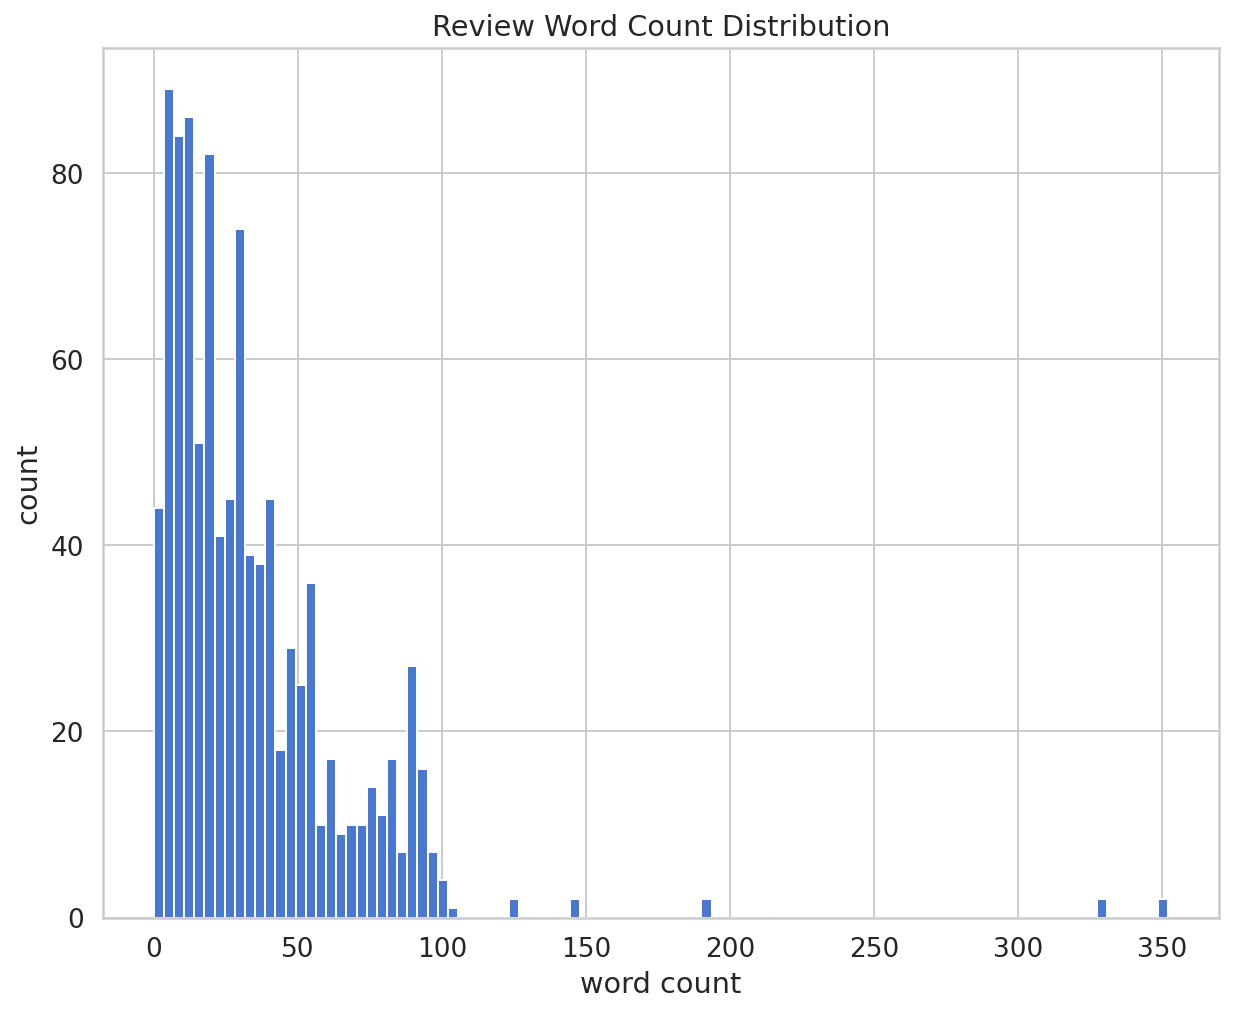

In [ ]:
plt.figure(figsize=(10,8))
ff['word_count'].hist(bins=100)
plt.title("Review Word Count Distribution")
plt.xlabel('word count')
plt.ylabel('count')

The number of words reviewers used were between 0 and 100

##**5. Further Data preprocessing**

**Further preprocessing of the review_text column:**

I have already cleaned the data, but there are still some steps left to be done. In this section, I’ll create a vocabulary of words used in the reviews. 

It will help in analyzing the occurrence of words in the different reviews.

In this section, I’ll do the following things:

* Stopwords Removal
* Lemmatization
* Create Vocabulary

Stopwords are the most common words of a language like ‘I’, ‘this’, ‘is’, ‘in’ which do not add much value to the meaning of a document. These values are removed to decrease the dataset size and increase focus on meaningful words.

Lemmatization is a systematic process of reducing a token to its lemma. It uses vocabulary, word structure, part of speech tags, and grammar relations to convert a word to its base form. 

I’ll use SpaCy for the removal of stopwords and lemmatization. It is a library for advanced Natural Language Processing in Python.

In [ ]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
ff['lemmatized'] = ff['review_text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))


In [ ]:
#check out the differences between content, review_text and lemmatized columns
ff.head()

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,review_text,polarity,review_len,word_count,lemmatized
0,Kelly Bergen,The idea is good but the execution is terrible...,1,12,2.19.0,2021-05-17 00:05:10,This doesn't seem right. We want to take a clo...,2020-01-08 18:56:51,most_relevant,the idea is good but the execution is terrible...,0.035714,470,91,idea good execution terrible not expect pay ac...
1,Kimmy T,Couldn't get search for a place closer to my h...,1,6,2.17.0,2021-04-17 04:07:45,So sorry to hear that Kimmy! We're always look...,2021-05-11 12:45:04,most_relevant,couldnt get search for a place closer to my ho...,0.061111,237,49,not search place closer home store show mile g...
2,Karen Williams,"D/l the app, tried several times to create a n...",1,4,2.17.0,2021-04-11 03:42:45,Hey Karen! So sorry to hear that! This error u...,2021-05-11 16:02:25,most_relevant,dl the app tried several times to create a new...,-0.160909,118,23,dl app try time create new account tell invali...
3,Rebecca Tutuola,Pantries and food banks could get this food to...,1,2,2.19.0,2021-05-18 20:07:43,We realize the importance of donations. Stores...,2021-05-26 17:17:31,most_relevant,pantries and food banks could get this food to...,0.500000,179,31,pantry food bank food family need volunteer or...
4,Charlie Bee,The items I bought 2 hours earlier (at a Maxi)...,1,1,2.17.0,2021-05-07 02:57:10,Oh no! That's extremely unfortunate and we're ...,2021-05-07 03:41:30,most_relevant,the items i bought hours earlier at a maxi wer...,0.000000,139,27,item buy hour earlier maxi throw away get allo...


In [ ]:
#previewing the lemmatized column
ff['lemmatized'].head()

0    idea good execution terrible not expect pay ac...
1    not search place closer home store show mile g...
2    dl app try time create new account tell invali...
3    pantry food bank food family need volunteer or...
4    item buy hour earlier maxi throw away get allo...
Name: lemmatized, dtype: object

As you can see above, the stopwords were removed

**Creating the Vocabulary:**

I'll create a vocabulary that shows the frequency of unique word for any given review. Will call the set of unique words a vocabulary.



In [ ]:
ff['lemmatized_lst'] =  ff['lemmatized'].str.split()

vocabulary = []

for i in ff['lemmatized_lst']:
    for word in i:
        vocabulary.append(word)

        
# transforming the vocabulary list into a set to remove duplicates
vocabulary_set =  set(vocabulary)

# transforming the vocabulary set back into a list
vocabulary_set = list(vocabulary_set)


print(len(vocabulary),'\n')
print(len(vocabulary_set))

15407 

1766


In [ ]:
#preview the vocabulary
vocabulary[:6]

['idea', 'good', 'execution', 'terrible', 'not', 'expect']

There are a total of 15407 words in the reviews and 1766 of the total words are unique. 

##**6. Data Analysis**

Here, I will convert the vocabulary list created above to a pandas series and get the most common words used in the reviews

In [ ]:
#convert the vocabulary to a series
vocab_series = pd.Series( (v for v in vocabulary) )
vocab_series.head()

0         idea
1         good
2    execution
3     terrible
4          not
dtype: object

In [ ]:
# Frequency of words in both absolute count and percentage

#first 25 words
absolute = vocab_series.value_counts().sort_values(ascending=False)[:25]
percentage = 100 * vocab_series.value_counts(normalize = True).sort_values(ascending=False)[:25]

#create a dataframe and put both in the dataframe
ap_df = pd.DataFrame({'absolute_count': absolute})
ap_df['percentage'] = percentage
ap_df

,absolute_count,percentage
app,678,4.400597
store,436,2.829883
not,396,2.570260
great,257,1.668073
food,217,1.408451
item,216,1.401960
work,189,1.226715
use,170,1.103395
time,168,1.090413
good,140,0.908678


Lets visualize the word count:

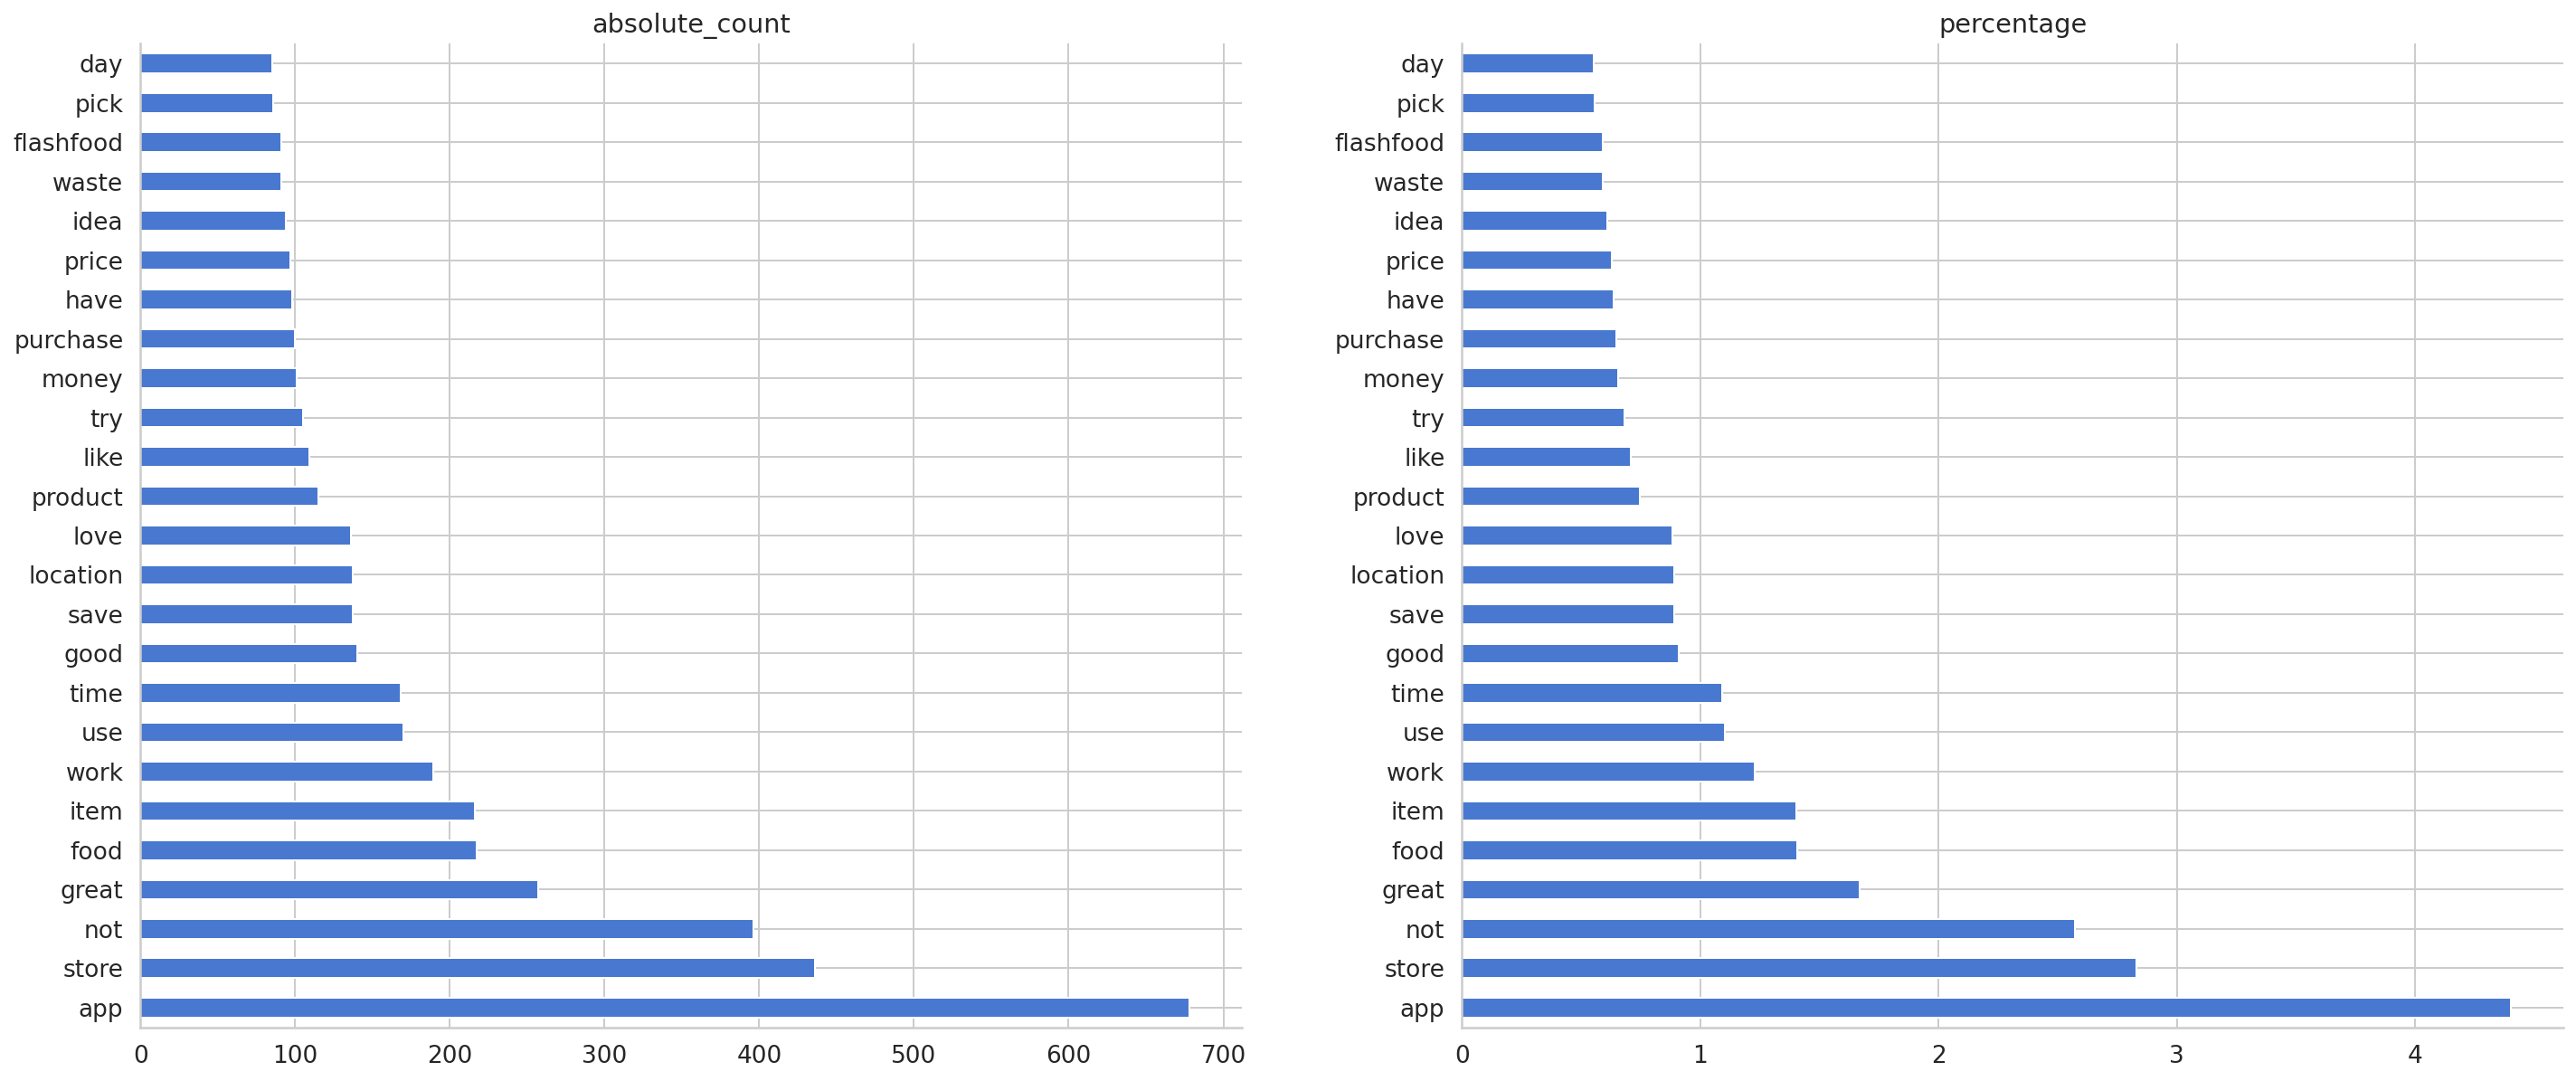

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))

ap_df['absolute_count'].plot(kind="barh", ax=axes[0], subplots=True)
ap_df['percentage'].plot(kind="barh", ax=axes[1], subplots=True)

sns.despine()

About 4.4 percent of the reviews mentioned the app. We can see positive words like: good, great, love, like. Attention also should be paid to words like: location, waste, food, item.

**To get context around the reviews, I'll write a function using generator function to get two-word list form the vocabulary list. Then, get the frequency:**

In [ ]:
# function
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

import pprint
two_word = pprint.pprint(list(chunks(vocabulary, 2)))
 
print(two_word)


Streaming output truncated to the last 5000 lines.
 ['appropriate', 'easily'],
 ['indicate', 'actual'],
 ['late', 'pickup'],
 ['date', 'app'],
 ['time', 'purchase'],
 ['have', 'notice'],
 ['picture', 'crop'],
 ['weight', 'size'],
 ['packaging', 'happen'],
 ['difficult', 'image'],
 ['coincidental', 'deliberate'],
 ['instal', 'refuse'],
 ['access', 'device'],
 ['location', 'allow'],
 ['search', 'store'],
 ['want', 'look'],
 ['item', 'available'],
 ['superstore', 's'],
 ['near', 'not'],
 ['know', 'work'],
 ['location', 'service'],
 ['turn', 'deal'],
 ['not', 'go'],
 ['location', 'silly'],
 ['allow', 'people'],
 ['enter', 'city'],
 ['choose', 'store'],
 ['manually', 'ill'],
 ['app', 'instal'],
 ['hopefully', 'future'],
 ['update', 'will'],
 ['manual', 'location'],
 ['update', 'great'],
 ['idea', 'implementation'],
 ['weak', 'time'],
 ['shopper', 'take'],
 ['order', 'maybe'],
 ['store', 'employee'],
 ['misplace', 'mistagge'],
 ['reliable', 'hope'],
 ['get', 'well'],
 ['will', 'not'],
 ['use

In [ ]:
#convert to a series
vs = pd.Series( (v for v in list(chunks(vocabulary, 2))) )
print(vs.head(),'\n')


# Frequency of words in both absolute count and percentage
#first 25 words

#create a dataframe and put both in the dataframe
vs_df = pd.DataFrame({'absolute_count': vs.value_counts().sort_values(ascending=False)[:25]})
vs_df['percentage'] = 100 * vs.value_counts(normalize = True).sort_values(ascending=False)[:25]
vs_df

0             [idea, good]
1    [execution, terrible]
2            [not, expect]
3          [pay, actually]
4          [store, arrive]
dtype: object 



,absolute_count,percentage
"[great, app]",26,0.337487
"[save, money]",24,0.311526
"[app, work]",23,0.298546
"[love, app]",22,0.285566
"[food, waste]",22,0.285566
"[grocery, store]",20,0.259605
"[easy, use]",20,0.259605
"[use, app]",19,0.246625
"[great, idea]",19,0.246625
"[great, deal]",18,0.233645


Lets visualize the two-word count:

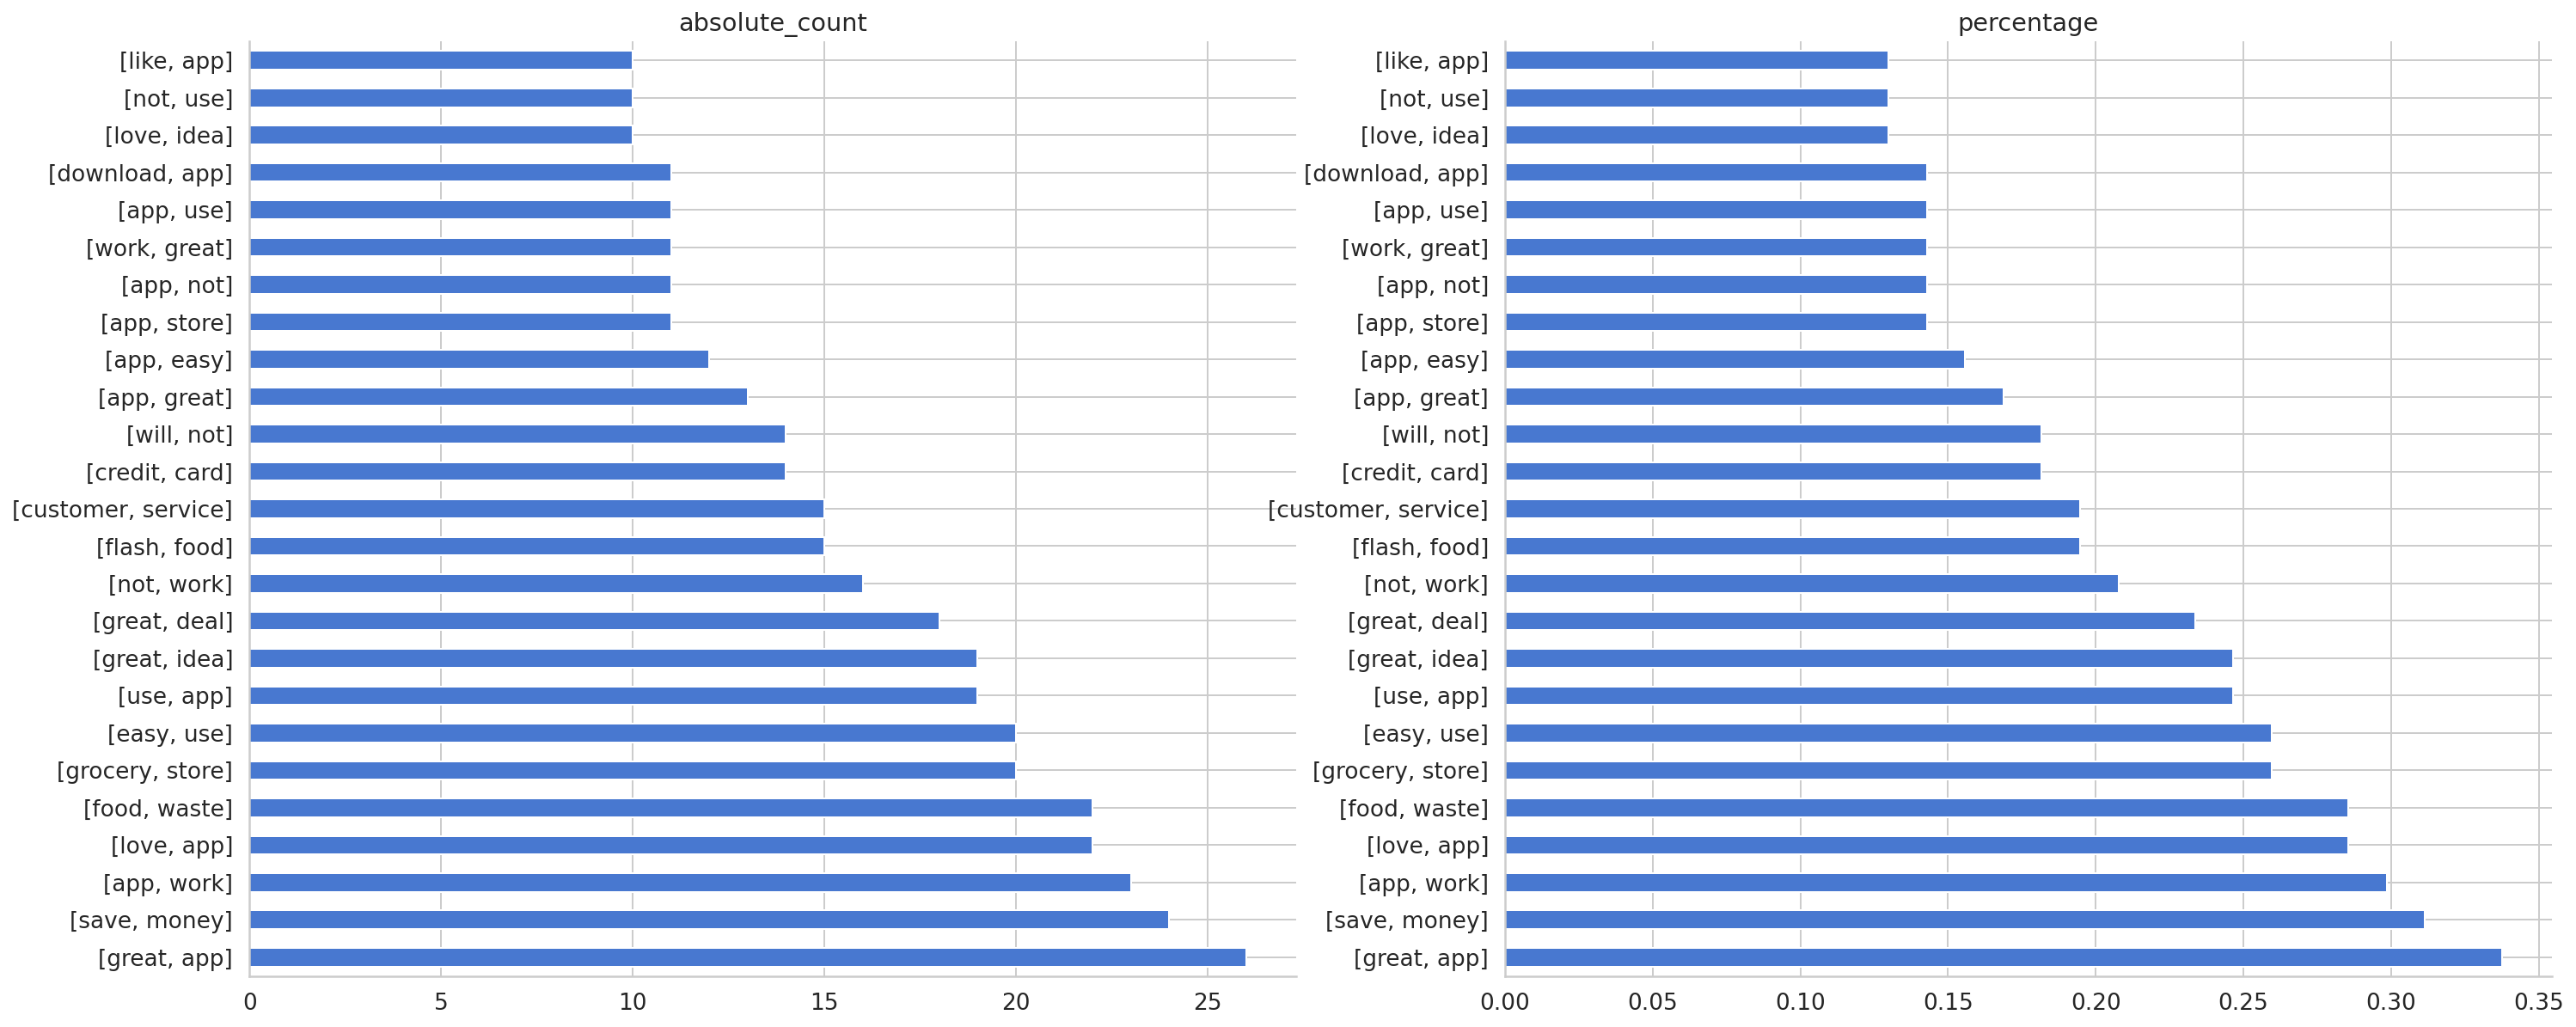

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))

vs_df['absolute_count'].plot(kind="barh", ax=axes[0], subplots=True)
vs_df['percentage'].plot(kind="barh", ax=axes[1], subplots=True)

sns.despine()

In this two-word analysis, about 0.33 percent of the reviews love the app. Majority of the reviews were positive. Customers love the great deals on foods, easy use of app and the idea behind the flashfood app.

**Lets do a four-word analysis:**

In [ ]:
#convert to a series
vs_four = pd.Series( (v for v in list(chunks(vocabulary, 4))) )
print(vs_four.head(),'\n')


# Frequency of words in both absolute count and percentage
#first 25 words

#create a dataframe and put both in the dataframe
vs_four_df = pd.DataFrame({'absolute_count': vs_four.value_counts().sort_values(ascending=False)[:25]})
vs_four_df['percentage'] = 100 * vs_four.value_counts(normalize = True).sort_values(ascending=False)[:25]
vs_four_df

0    [idea, good, execution, terrible]
1         [not, expect, pay, actually]
2         [store, arrive, edited, add]
3         [item, not, arrive, request]
4           [refund, oct, week, later]
dtype: object 



,absolute_count,percentage
"[great, way, save, food]",3,0.077882
"[help, reduce, food, waste]",3,0.077882
"[price, instead, regular, price]",2,0.051921
"[description, app, say, international]",2,0.051921
"[apple, orange, turn, grapefruit]",2,0.051921
"[potential, app, unfortunately, local]",2,0.051921
"[grocery, store, area, multiple]",2,0.051921
"[photo, concept, be, get]",2,0.051921
"[save, money, help, reduce]",2,0.051921
"[will, not, allow, check]",2,0.051921


The four-word visualization:

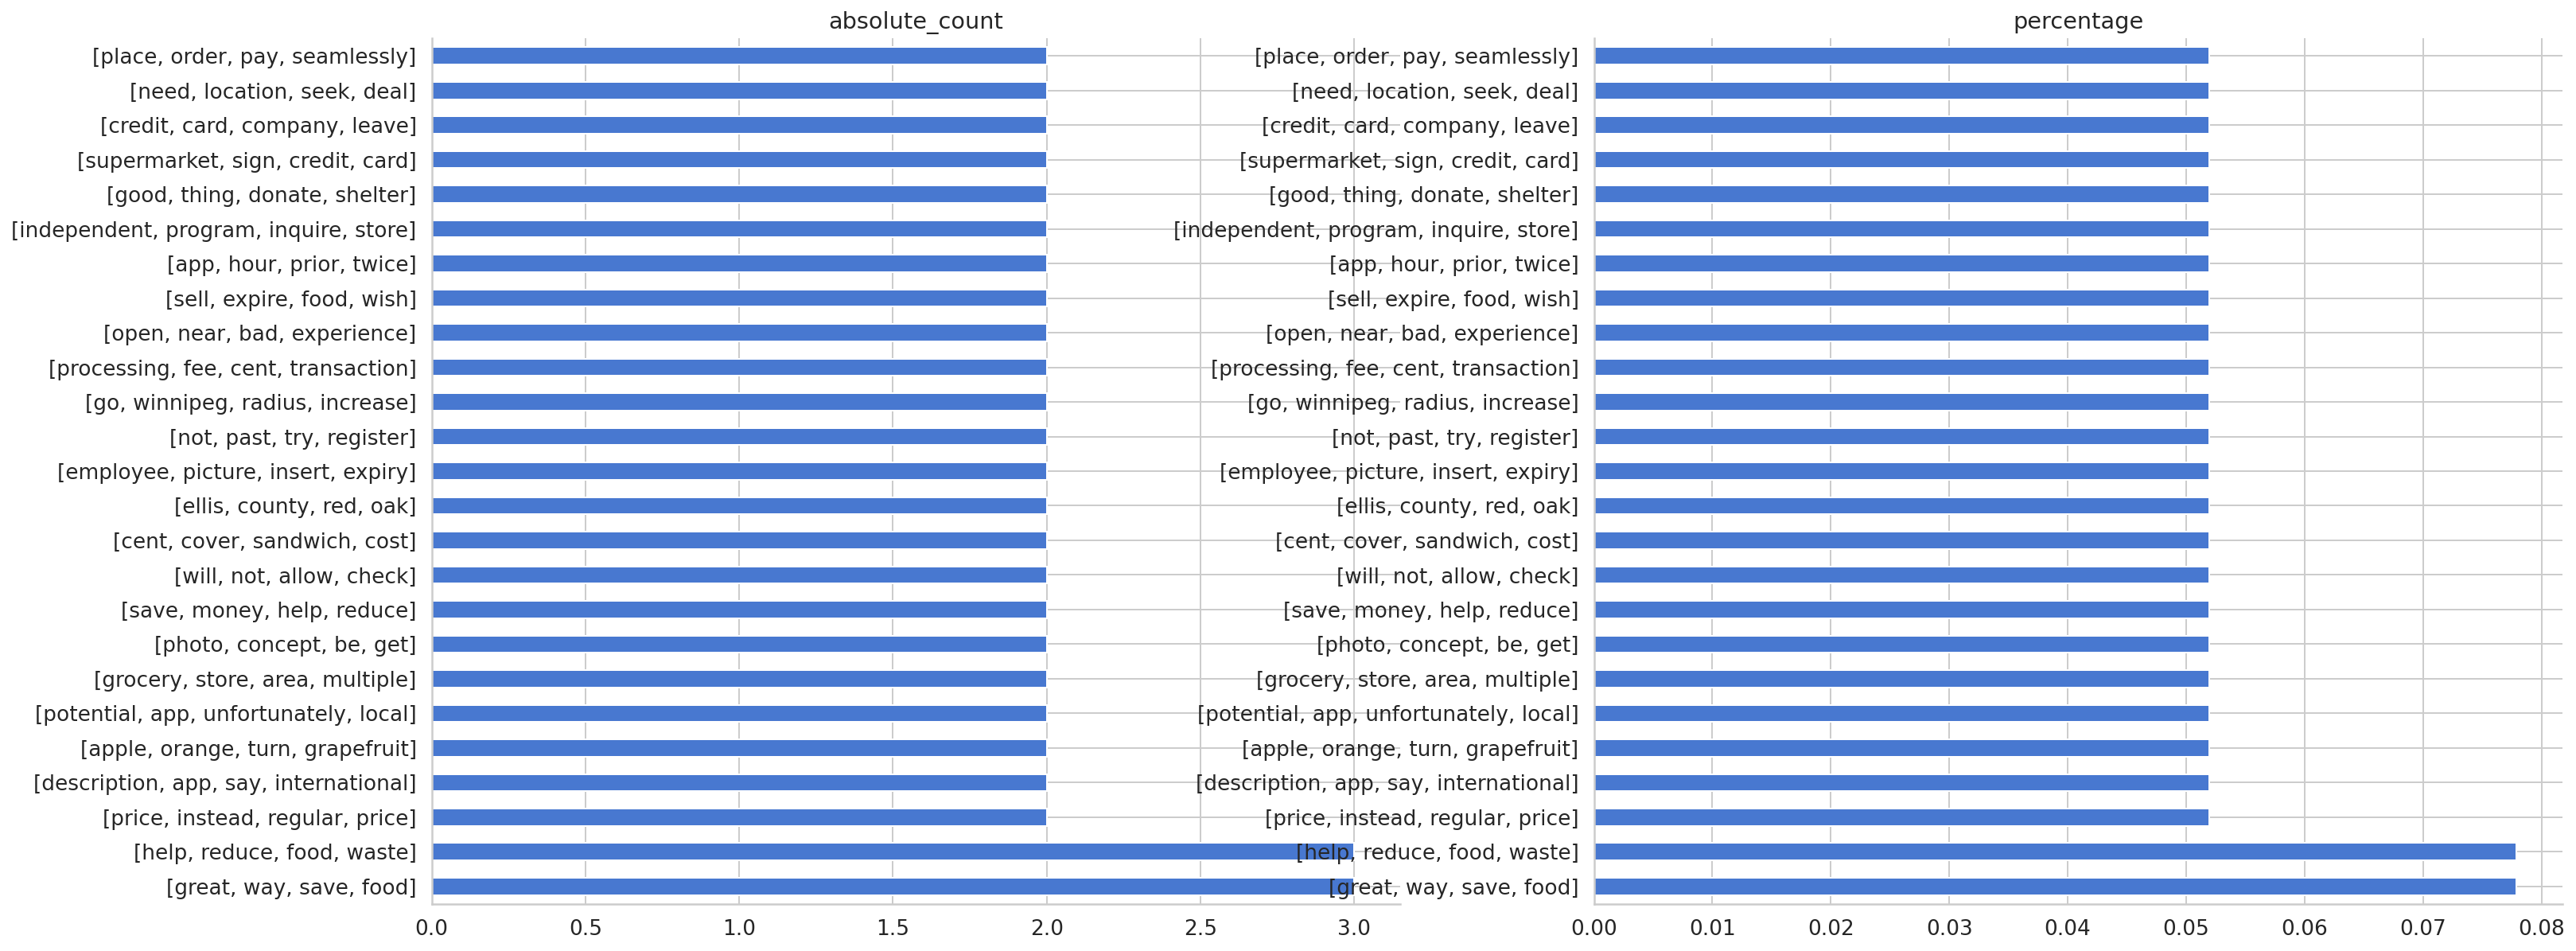

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))

vs_four_df['absolute_count'].plot(kind="barh", ax=axes[0], subplots=True)
vs_four_df['percentage'].plot(kind="barh", ax=axes[1], subplots=True)

sns.despine()

Pay attention to the words. Here, there are positive reviews but we can see that words like: location, bad experience and credit card, mentioned. It seems customers were concerned about payment methods, app location privacy and customer service.

**To extract deeper insights from the review word analysis, I'll do a ten-word analysis:**

In [ ]:
#convert to a series
vs_ten = pd.Series( (v for v in list(chunks(vocabulary, 10))) )
print(vs_ten.head(),'\n')


# Frequency of words in both absolute count and percentage
#first 25 words

#create a dataframe and put both in the dataframe
vs_ten_df = pd.DataFrame({'absolute_count': vs_ten.value_counts().sort_values(ascending=False)[:25]})
vs_ten_df['percentage'] = 100 * vs_ten.value_counts(normalize = True).sort_values(ascending=False)[:25]
vs_ten_df

0    [idea, good, execution, terrible, not, expect,...
1    [edited, add, item, not, arrive, request, refu...
2    [be, wait, not, think, right, edit, decide, tr...
3    [friend, tell, have, success, not, thing, deci...
4    [year, later, not, search, place, closer, home...
dtype: object 



,absolute_count,percentage
"[like, frill, safeway, saveon, etc, access, reciept, connect, wifi, superstore]",2,0.129786
"[place, order, pay, seamlessly, go, pick, order, work, item, store]",2,0.129786
"[not, work, activate, location, service, allow, plug, postal, code, like]",2,0.129786
"[find, app, surprised, sell, fruit, dip, sort, product, soon, expire]",2,0.129786
"[need, description, size, weight, product, maybe, zoom, ingredient, list, store]",2,0.129786
"[promptly, greatly, appreciate, sure, hope, store, open, near, bad, experience]",2,0.129786
"[half, cost, bit, disappointed, order, product, online, pick, product, miss]",2,0.129786
"[blurry, hard, exactly, s, lastly, prefer, search, zip, code, manually]",2,0.129786
"[update, customer, service, outstanding, reply, refund, request, miss, item, refund]",2,0.129786
"[great, want, save, money, help, reduce, food, waste, find, food]",2,0.129786


The ten word visualization:

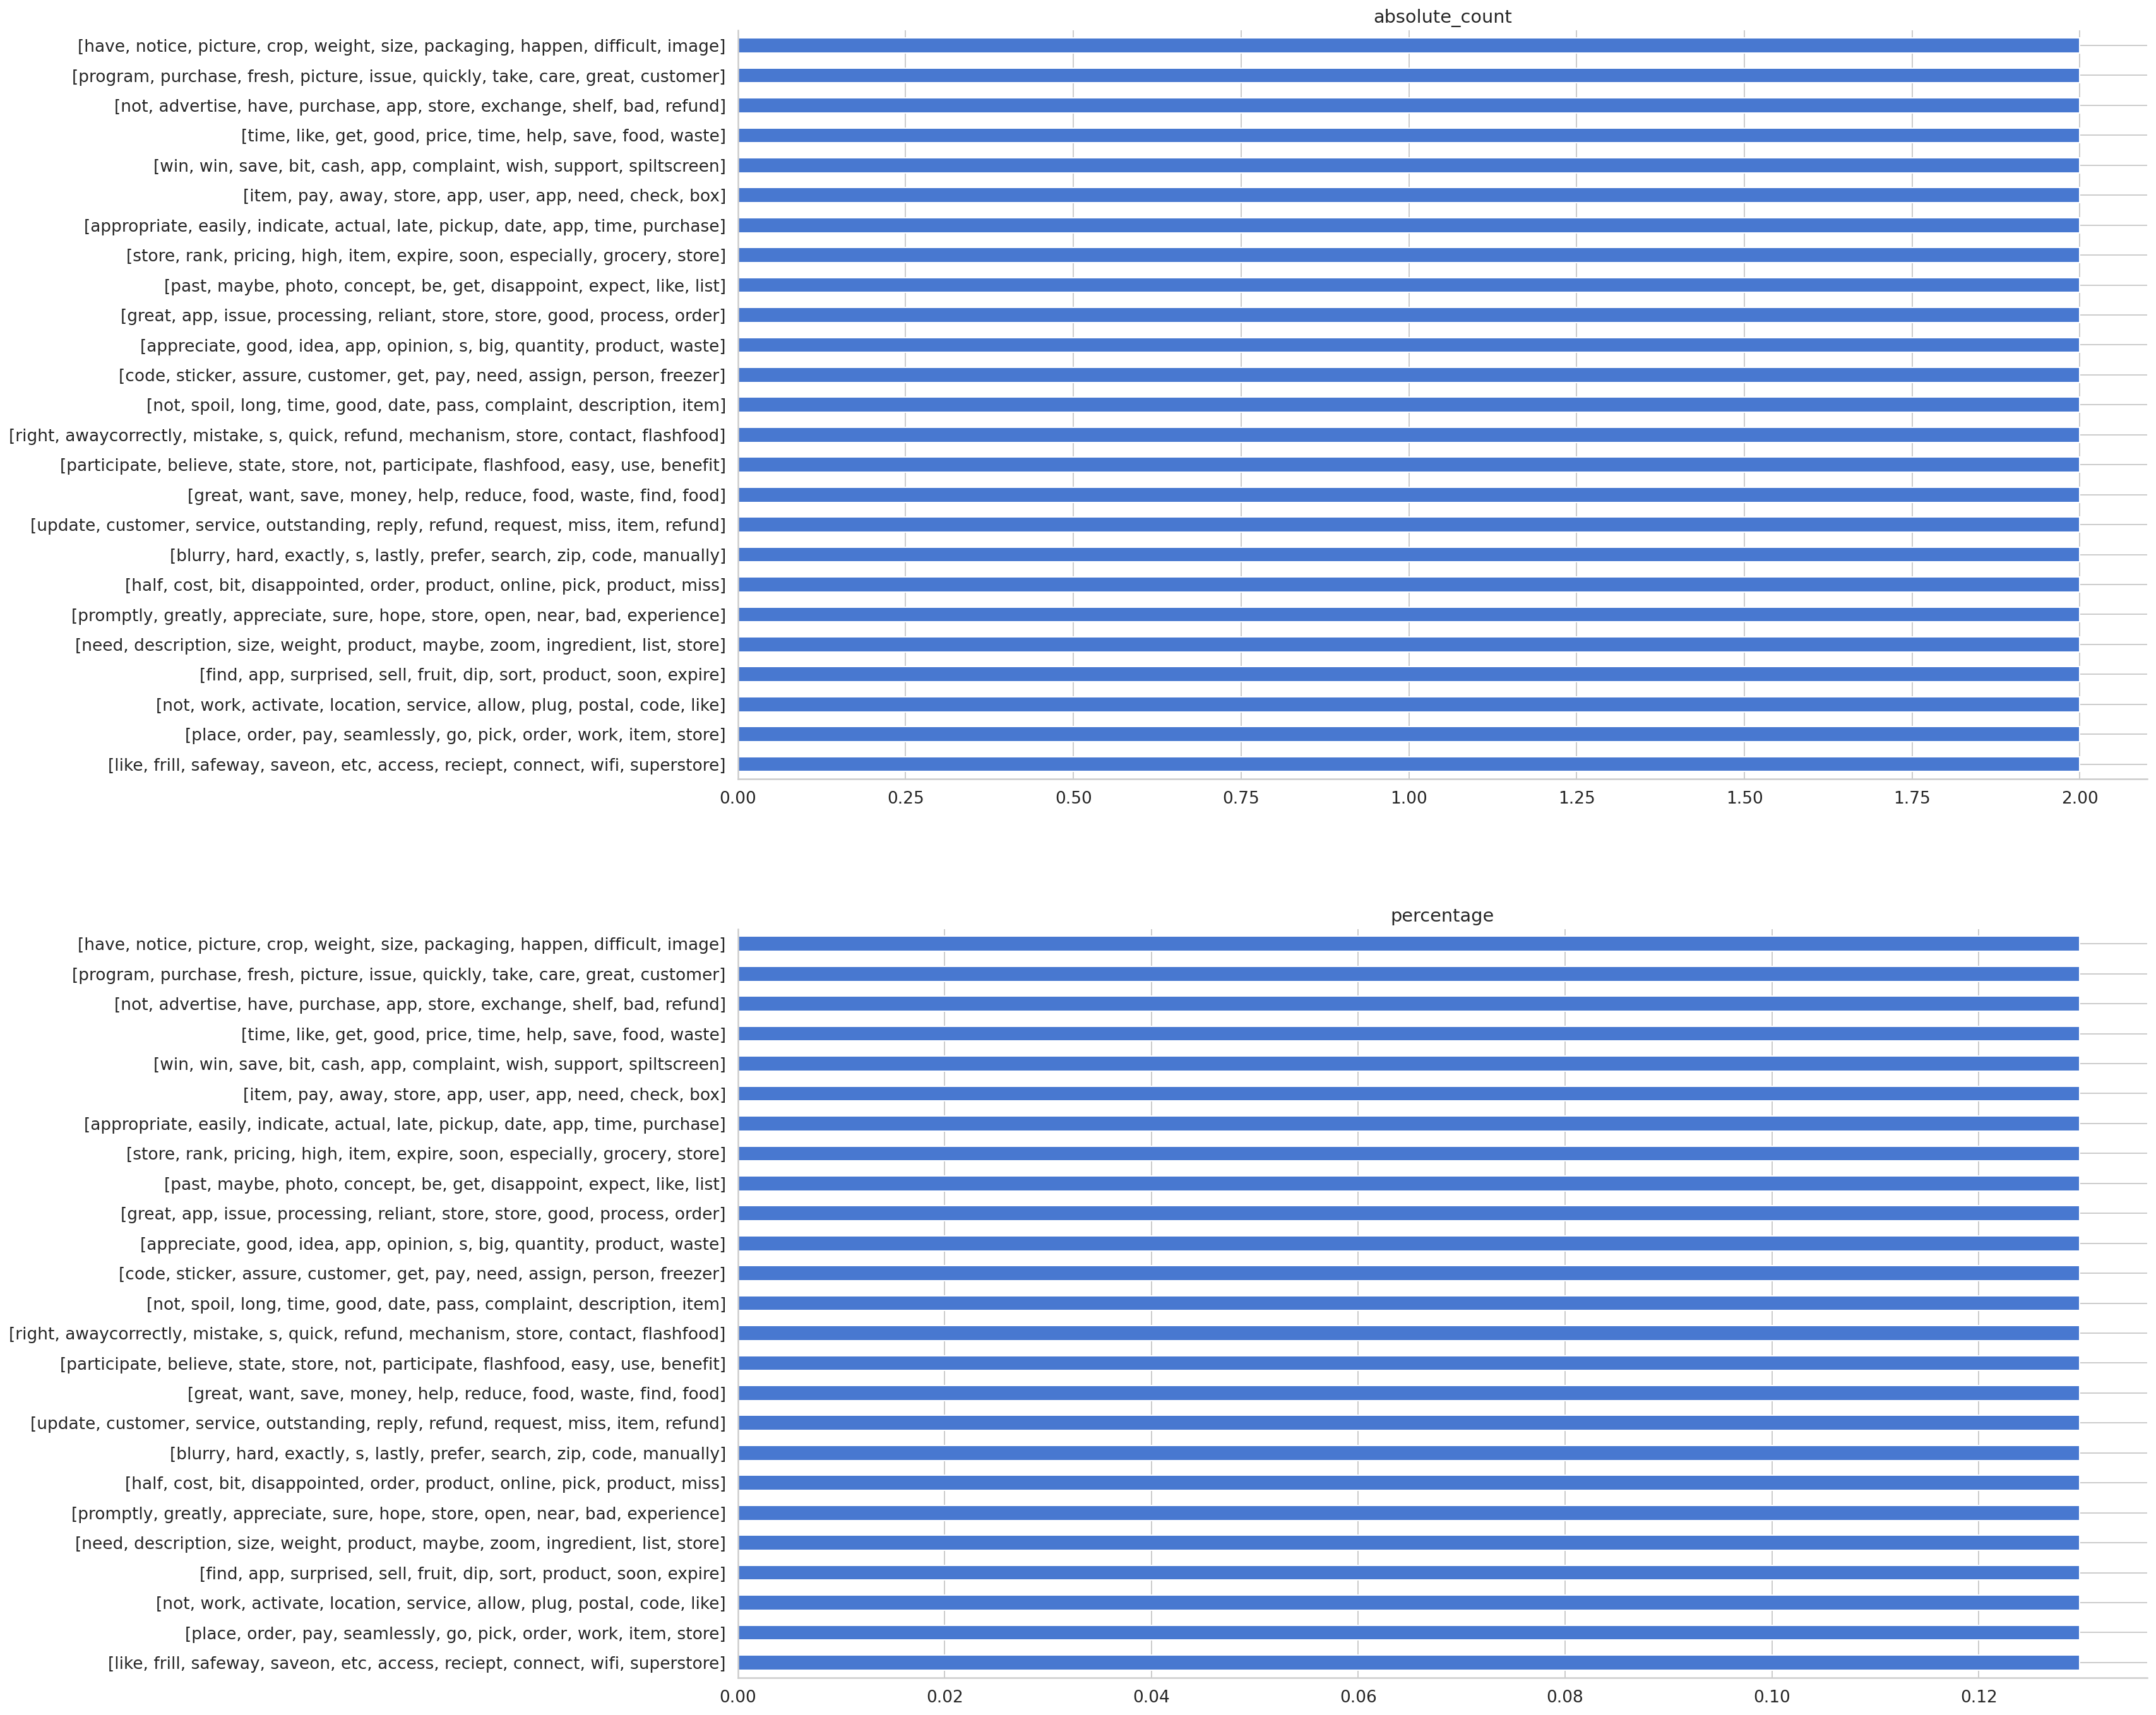

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches((20, 24))

vs_ten_df['absolute_count'].plot(kind="barh", ax=axes[0], subplots=True)
vs_ten_df['percentage'].plot(kind="barh", ax=axes[1], subplots=True)

sns.despine()

The context of the review is now clearer with the ten-word analysis:

Most of the review words here are negative. Customers complained about missing items, food item expire, poor image and description of food products, issues with refund request, dissapointment with order, app location request concerns.

##**7. Conclusion and Recommendations**

In this project, I scraped the Flashfood App review data from Google play store. Then, I used text-processing techniques to extract actionable insights from the app reviews data.

Let’s take a look at the insights drawn from the above analysis:

* Customers love the idea behind Flashfood. Majority found the app easy to use, however, some had issues with the app.
* Flashfood needs to work on the app location request. Most customers concerned about location privacy. Flashfood can ask for zip code instead of the exact customer location.
* While most customers reviewed good customer serice, some had bad experience. I'm assuming this has to do with partner stores.
* Payment methods were mentioned. Flashfood can add more payment options on the app.
* Reviews with missing items and expired food keywords were mentioned. Flashfood should work with their partners on this. 
* Poor image and description of items made customers disappointed with their order. Efforts should be put on good description of food items and quality images. This will increase sales (I read sometime ago about similar issues in the early days of AirBnB and the impact good images and description had in drving its growth)
* Flashfood should create a solution that handles refund requests quickly. Some customers complained about the long process of getting refunds.


##**8. Caveat**

With the considerations made when scraping the data, time the reviews were made can be a factor in the above analysis. The timeframe of the reviews dataset ranges from 2017-05-11 to 2021-06-06. So its possible, the negative reviews made have been resolved by Flashfood. Also, the reviews might have been made at the launch of the app. Therefore, the limitation of this project is that the timeframe was not considered during the analysis.

##**9. Additional Information**

I manually went through the 1 star Flashfood app reviews on google play store, with the timeframe between 8-5-2017 to 5-6-2021, then made the following observations:

Out of 277 reviews:
* 8.3% were complaints about goods not at store when the customer went for pickup and no refunds, citing poor customer service.
* 16% were complaints about distance from home to the Flashfood partner stores
* 32% were complaints about issues about account creation on the app, log in issues and general problems with the app
* 7% were complaints about poor quality of food, low image quality and poorly described items
* 12% of the complaints claimed app doesn't deliver promises and poor execution of idea
* 16% were complaints about app location request. There were privacy concerns among customer reviews
* 5% had issues with payment on the app. Payment methods were not enough
* 4% complaints were about limited items and small number of selected partner stores

Therefore, the above analysis supports the earlier findings made from the keyword review analysis.

